In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
#Load Data 

In [4]:
df = pd.read_csv('data/JP/R13296298_SL140.csv')

In [5]:
df.shape

(10, 88)

In [6]:
df.head

<bound method NDFrame.head of      Geo_FIPS           Geo_GEOID              Geo_NAME  \
0  6037218701  14000US06037218701  Census Tract 2187.01   
1  6037218702  14000US06037218702  Census Tract 2187.02   
2  6037218800  14000US06037218800     Census Tract 2188   
3  6037218900  14000US06037218900     Census Tract 2189   
4  6037219010  14000US06037219010  Census Tract 2190.10   
5  6037219020  14000US06037219020  Census Tract 2190.20   
6  6037219300  14000US06037219300     Census Tract 2193   
7  6037221401  14000US06037221401  Census Tract 2214.01   
8  6037221402  14000US06037221402  Census Tract 2214.02   
9  6037222001  14000US06037222001  Census Tract 2220.01   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Census Tract 2187.01, Los Angeles County, Cali...         ca         140   
1  Census Tract 2187.02, Los Angeles County, Cali...         ca         140   
2  Census Tract 2188, Los Angeles County, California         ca         140   
3  C

In [7]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
2,6037218800,14000US06037218800,Census Tract 2188,"Census Tract 2188, Los Angeles County, California",ca,140,0,ACSSF,4528,NaN,...,8.79,12.51,3.52,6.72,12.31,6.93,11.07,3.83,6.51,0.72


In [8]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           10 non-null     int64  
 1   Geo_GEOID          10 non-null     object 
 2   Geo_NAME           10 non-null     object 
 3   Geo_QName          10 non-null     object 
 4   Geo_STUSAB         10 non-null     object 
 5   Geo_SUMLEV         10 non-null     int64  
 6   Geo_GEOCOMP        10 non-null     int64  
 7   Geo_FILEID         10 non-null     object 
 8   Geo_LOGRECNO       10 non-null     int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          10 non-null     int64  
 14  Geo_COUNTY         10 non-null     int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-null

In [9]:
df.Geo_FIPS.head()

0    6037218701
1    6037218702
2    6037218800
3    6037218900
4    6037219010
Name: Geo_FIPS, dtype: int64

In [10]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [11]:
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [12]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/JP/R13296298_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [13]:
df.Geo_FIPS.head()

0    06037218701
1    06037218702
2    06037218800
3    06037218900
4    06037219010
Name: Geo_FIPS, dtype: object

In [14]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [15]:
df=df.dropna(axis=1,how="all")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           10 non-null     object 
 1   Geo_GEOID          10 non-null     object 
 2   Geo_NAME           10 non-null     object 
 3   Geo_QName          10 non-null     object 
 4   Geo_STUSAB         10 non-null     object 
 5   Geo_SUMLEV         10 non-null     int64  
 6   Geo_GEOCOMP        10 non-null     int64  
 7   Geo_FILEID         10 non-null     object 
 8   Geo_LOGRECNO       10 non-null     int64  
 9   Geo_STATE          10 non-null     object 
 10  Geo_COUNTY         10 non-null     object 
 11  Geo_TRACT          10 non-null     int64  
 12  SE_A14001_001      10 non-null     int64  
 13  SE_A14001_002      10 non-null     int64  
 14  SE_A14001_003      10 non-null     int64  
 15  SE_A14001_004      10 non-null     int64  
 16  SE_A14001_005      10 non-nul

In [17]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [18]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [19]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       10 non-null     object
 1   SE_A14001_002  10 non-null     int64 
 2   SE_A14001_003  10 non-null     int64 
 3   SE_A14001_004  10 non-null     int64 
 4   SE_A14001_005  10 non-null     int64 
 5   SE_A14001_006  10 non-null     int64 
 6   SE_A14001_007  10 non-null     int64 
 7   SE_A14001_008  10 non-null     int64 
 8   SE_A14001_009  10 non-null     int64 
 9   SE_A14001_010  10 non-null     int64 
 10  SE_A14001_011  10 non-null     int64 
 11  SE_A14001_012  10 non-null     int64 
 12  SE_A14001_013  10 non-null     int64 
 13  SE_A14001_014  10 non-null     int64 
 14  SE_A14001_015  10 non-null     int64 
 15  SE_A14001_016  10 non-null     int64 
 16  SE_A14001_017  10 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 1.5+ KB


In [20]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [21]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [22]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48
1,06037218702,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11
2,06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7
3,06037218900,144,260,132,60,146,118,199,129,92,63,211,196,123,43,173,51
4,06037219010,56,61,38,68,37,30,75,45,19,60,83,126,67,26,102,26
5,06037219020,101,108,94,82,64,25,50,19,33,175,259,105,102,85,122,38
6,06037219300,137,55,48,146,103,143,85,45,32,54,193,217,101,68,41,12
7,06037221401,124,163,125,209,66,74,42,84,25,22,61,61,30,55,50,46
8,06037221402,78,112,99,72,35,18,51,48,40,64,55,50,57,34,53,30
9,06037222001,46,45,21,4,65,83,58,14,48,30,69,127,103,45,106,64


In [23]:
# Doing some stats 
df2.mean()

FIPS                  6.037219e+107
Less than $10,000      9.350000e+01
$10,000-$14,999        9.230000e+01
$15,000-$19,999        6.830000e+01
$20,000-$24,999        7.360000e+01
$25,000-$29,999        6.470000e+01
$30,000-$34,999        6.860000e+01
$35,000-$39,999        7.890000e+01
$40,000-$44,999        5.950000e+01
$45,000-$49,999        4.070000e+01
$50,000-$59,999        7.250000e+01
$60,000-$74,999        1.203000e+02
$75,000-$99,999        1.072000e+02
$100,000-$124,999      7.650000e+01
$125,000-$149,999      4.660000e+01
$150,000-$199,999      7.790000e+01
More than $200,000     3.330000e+01
dtype: float64

In [24]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48
1,06037218702,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11
2,06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7
3,06037218900,144,260,132,60,146,118,199,129,92,63,211,196,123,43,173,51
4,06037219010,56,61,38,68,37,30,75,45,19,60,83,126,67,26,102,26


In [25]:
# IDK if this is right but 72 households fall in the less than $10,000 category of all households in LA county 
df2['Less than $10,000'].mean()

93.5

In [26]:
df2.median()

FIPS                  6.037219e+09
Less than $10,000     9.100000e+01
$10,000-$14,999       5.900000e+01
$15,000-$19,999       6.450000e+01
$20,000-$24,999       6.400000e+01
$25,000-$29,999       5.950000e+01
$30,000-$34,999       7.300000e+01
$35,000-$39,999       6.650000e+01
$40,000-$44,999       4.650000e+01
$45,000-$49,999       3.350000e+01
$50,000-$59,999       6.350000e+01
$60,000-$74,999       8.650000e+01
$75,000-$99,999       8.950000e+01
$100,000-$124,999     8.400000e+01
$125,000-$149,999     4.050000e+01
$150,000-$199,999     5.800000e+01
More than $200,000    3.400000e+01
dtype: float64

In [27]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000
mean,93.500000,92.3000,68.300000,73.600000,64.700000,68.600000,78.900000,59.500000,40.700000,72.500000,120.300000,107.200000,76.500000,46.600000,77.9000,33.300000
std,33.530252,72.4002,43.348843,61.595815,35.355496,40.672677,47.857311,40.103339,21.509946,44.400325,73.602612,59.817872,34.532593,17.957976,46.7296,19.327873
min,46.000000,26.0000,15.000000,4.000000,35.000000,18.000000,36.000000,14.000000,19.000000,22.000000,55.000000,49.000000,30.000000,26.000000,18.0000,7.000000
25%,69.750000,47.5000,32.000000,33.500000,37.500000,33.500000,50.250000,32.250000,26.750000,55.500000,64.500000,62.500000,44.250000,35.500000,50.2500,15.500000
50%,91.000000,59.0000,64.500000,64.000000,59.500000,73.000000,66.500000,46.500000,33.500000,63.500000,86.500000,89.500000,84.000000,40.500000,58.0000,34.000000
75%,118.250000,111.0000,97.750000,79.500000,65.750000,82.000000,85.000000,78.500000,46.000000,71.000000,174.500000,126.750000,102.750000,52.500000,105.0000,47.500000
max,144.000000,260.0000,132.000000,209.000000,146.000000,143.000000,199.000000,129.000000,92.000000,175.000000,259.000000,217.000000,123.000000,85.000000,173.0000,64.000000


<AxesSubplot: title={'center': 'Jefferson Park'}>

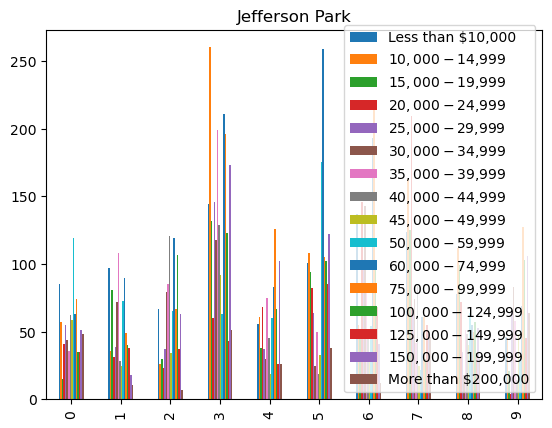

In [28]:
df2.plot.bar(title = "Jefferson Park")

In [29]:
df.columns

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [30]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [31]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_543/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48,879
1,06037218702,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11,836
2,06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7,967


In [32]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/JP/R13296298_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037218701,14000US06037218701,Census Tract 2187.01,"Census Tract 2187.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4526,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,218701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48,9.67,6.48,1.71,4.66,6.26,5.01,4.10,7.05,6.71,13.54,7.17,8.42,3.98,3.98,5.80,5.46
1,6037218702,14000US06037218702,Census Tract 2187.02,"Census Tract 2187.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4527,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,218702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11,11.60,4.31,9.69,3.71,4.67,8.61,12.92,3.35,2.99,8.73,10.77,5.86,4.78,4.55,2.15,1.32
2,6037218800,14000US06037218800,Census Tract 2188,"Census Tract 2188, Los Angeles County, California",ca,140,0,ACSSF,4528,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,218800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,967,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7,6.93,2.69,3.10,2.38,3.83,8.17,8.79,12.51,3.52,6.72,12.31,6.93,11.07,3.83,6.51,0.72
3,6037218900,14000US06037218900,Census Tract 2189,"Census Tract 2189, Los Angeles County, California",ca,140,0,ACSSF,4529,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,218900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2140,144,260,132,60,146,118,199,129,92,63,211,196,123,43,173,51,6.73,12.15,6.17,2.80,6.82,5.51,9.30,6.03,4.30,2.94,9.86,9.16,5.75,2.01,8.08,2.38
4,6037219010,14000US06037219010,Census Tract 2190.10,"Census Tract 2190.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4530,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,219010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919,56,61,38,68,37,30,75,45,19,60,83,126,67,26,102,26,6.09,6.64,4.13,7.40,4.03,3.26,8.16,4.90,2.07,6.53,9.03,13.71,7.29,2.83,11.10,2.83


In [33]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

8     896
0     879
4     919
7    1237
2     967
5    1462
9     928
1     836
6    1480
3    2140
Name: SE_A14001_001, dtype: int64

In [34]:
df_householdsize.describe()

count      10.000000
mean     1174.400000
std       416.419447
min       836.000000
25%       901.750000
50%       947.500000
75%      1405.750000
max      2140.000000
Name: SE_A14001_001, dtype: float64

In [35]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_543/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
0,06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48,879,198
9,06037222001,46,45,21,4,65,83,58,14,48,30,69,127,103,45,106,64,928,116
3,06037218900,144,260,132,60,146,118,199,129,92,63,211,196,123,43,173,51,2140,596
6,06037219300,137,55,48,146,103,143,85,45,32,54,193,217,101,68,41,12,1480,386
2,06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7,967,146


In [36]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_543/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
3,06037218900,144,260,132,60,146,118,199,129,92,63,211,196,123,43,173,51,2140,596,27.850467
2,06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7,967,146,15.098242
5,06037219020,101,108,94,82,64,25,50,19,33,175,259,105,102,85,122,38,1462,385,26.333789
1,06037218702,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11,836,245,29.306220
4,06037219010,56,61,38,68,37,30,75,45,19,60,83,126,67,26,102,26,919,223,24.265506
6,06037219300,137,55,48,146,103,143,85,45,32,54,193,217,101,68,41,12,1480,386,26.081081
9,06037222001,46,45,21,4,65,83,58,14,48,30,69,127,103,45,106,64,928,116,12.500000
8,06037221402,78,112,99,72,35,18,51,48,40,64,55,50,57,34,53,30,896,361,40.290179
7,06037221401,124,163,125,209,66,74,42,84,25,22,61,61,30,55,50,46,1237,621,50.202102
0,06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48,879,198,22.525597


<AxesSubplot: ylabel='Frequency'>

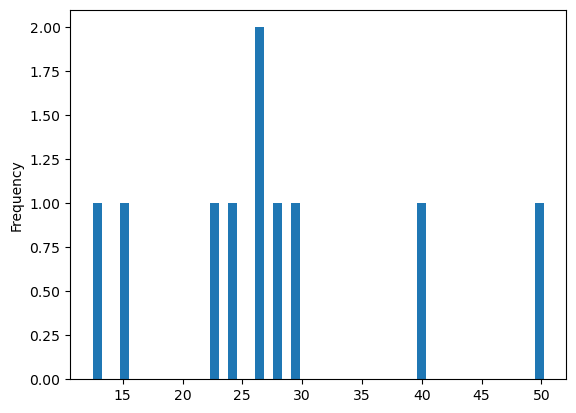

In [37]:
df2['p_poverty'].plot.hist(bins=50)

In [38]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
7,06037221401,50.202102
8,06037221402,40.290179
1,06037218702,29.306220
3,06037218900,27.850467
5,06037219020,26.333789
6,06037219300,26.081081
4,06037219010,24.265506
0,06037218701,22.525597
2,06037218800,15.098242
9,06037222001,12.500000


<AxesSubplot: xlabel='FIPS'>

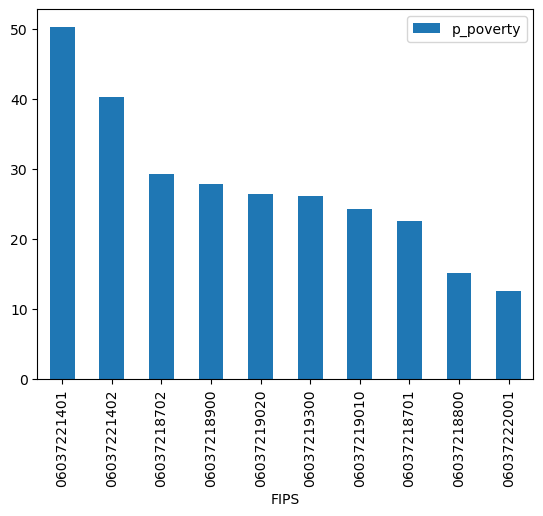

In [39]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where Jeffersons Park has more poverty'}, ylabel='FIPS'>

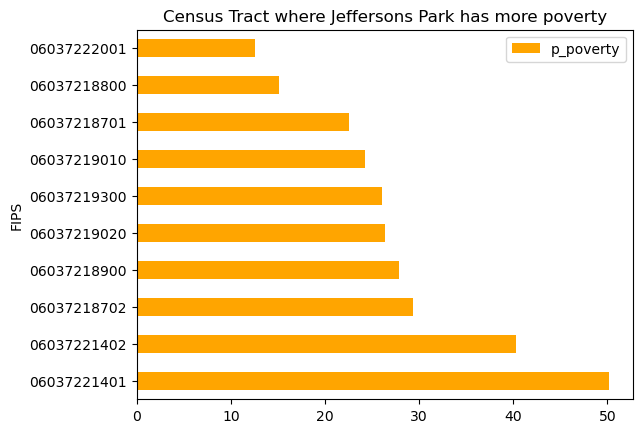

In [47]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where Jeffersons Park has more poverty',
                            color='orange')

In [41]:
import geopandas as gpd

In [42]:
# Import geojson file of LA County
tracts=gpd.read_file('data/JP/Census_Tracts_2020.geojson')
tracts.head(2)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [43]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [44]:
tracts=tracts.merge(df2, on="FIPS")

In [45]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,726,218701,2187.01,5.919075e+06,10687.115260,"POLYGON ((-118.32665 34.03989, -118.32725 34.0...",06037218701,85,57,15,41,55,44,36,62,59,119,63,74,35,35,51,48,879,198,22.525597
1,727,218702,2187.02,3.871445e+06,10285.101669,"POLYGON ((-118.32838 34.03261, -118.32839 34.0...",06037218702,97,36,81,31,39,72,108,28,25,73,90,49,40,38,18,11,836,245,29.306220
2,728,218800,2188.00,4.430870e+06,9005.065425,"POLYGON ((-118.32767 34.03524, -118.32729 34.0...",06037218800,67,26,30,23,37,79,85,121,34,65,119,67,107,37,63,7,967,146,15.098242


<AxesSubplot: >

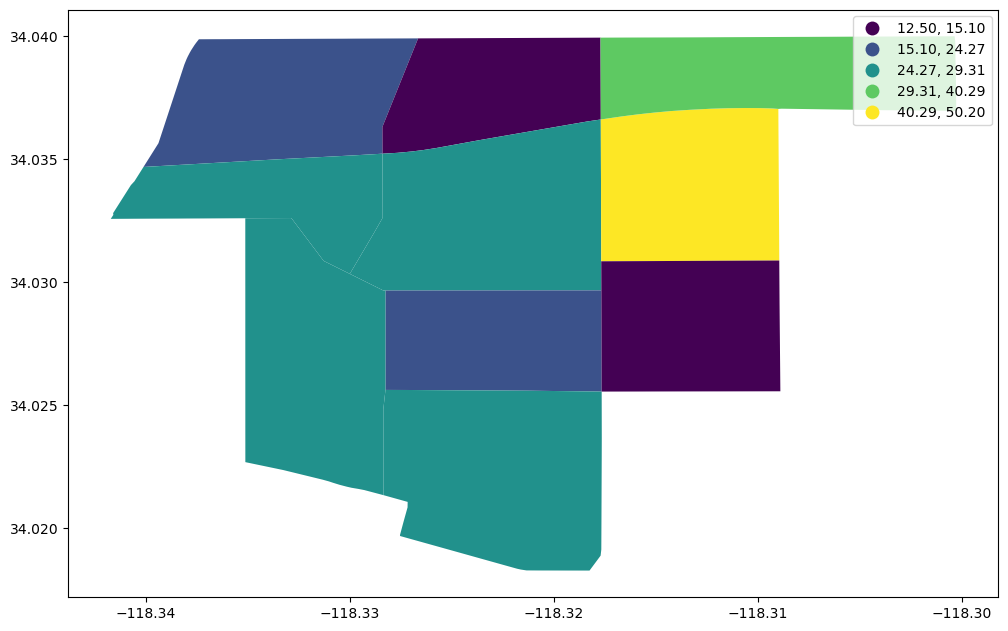

In [46]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')